# Calculating Cracked Properties

This example demonstrates how to obtain and display the cracked area properties. We start by importing the necessary modules.

In [1]:
import numpy as np
from concreteproperties.material import Concrete, SteelBar
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
)
from sectionproperties.pre.library.concrete_sections import concrete_tee_section
from concreteproperties.concrete_section import ConcreteSection

## Assign Materials

The materials used in this example will be 40 MPa concrete and 500 MPa steel, specified in accordance with AS 3600:2018.

In [2]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=32.8e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

## Create Geometry and Concrete Section

The section being analysed in this example is a 900D x 300W tee-beam with a 1200W x 200D slab. The reinforcement detailed is 6N16 top bars and 3N32 bottom bars, with 30 mm of clear cover. The geometry is generated using the *sectionproperties* concrete sections library.

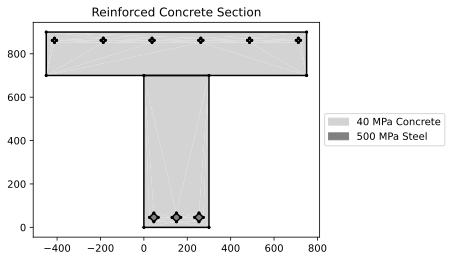

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = concrete_tee_section(
    b=300,
    d=900,
    b_f=1200,
    d_f=200,
    dia_top=16,
    n_top=6,
    dia_bot=32,
    n_bot=3,
    n_circle=4,
    cover=30,
    area_top=200,
    area_bot=800,
    conc_mat=concrete,
    steel_mat=steel,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

## Calclulate Cracked Properties

In this example we'll peform a cracked analysis for sagging ($\theta=0$) and hogging ($\theta=\pi$). To do this we call the ``calculate_cracked_properties()`` method:

In [4]:
cracked_res_sag = conc_sec.calculate_cracked_properties()
cracked_res_hog = conc_sec.calculate_cracked_properties(theta=np.pi)

We can print the results of these analyses by calling the ``print_results`` method:

In [5]:
cracked_res_sag.print_results()
cracked_res_hog.print_results()

   Cracked Concrete Section   
          Properties          
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property   ┃         Value ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ theta      │  0.000000e+00 │
│ M_cr       │  2.366267e+08 │
│ d_nc       │  1.293897e+02 │
│ E.A_cr     │  5.773397e+09 │
│ E.Qx_cr    │  4.449039e+12 │
│ E.Qy_cr    │  8.660095e+11 │
│ x-Centroid │  1.500000e+02 │
│ y-Centroid │  7.706103e+02 │
│ E.Ixx_g_cr │  3.710634e+15 │
│ E.Iyy_g_cr │  7.741002e+14 │
│ E.Ixy_g_cr │  6.673559e+14 │
│ E.Ixx_c_cr │  2.821589e+14 │
│ E.Iyy_c_cr │  6.441988e+14 │
│ E.Ixy_c_cr │ -3.750000e-01 │
│ E.Iuu_cr   │  2.821589e+14 │
│ E.I11_cr   │  6.441988e+14 │
│ E.I22_cr   │  2.821589e+14 │
│ phi_cr     │ -1.570796e+00 │
└────────────┴───────────────┘

  Cracked Concrete Section   
         Properties          
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Property   ┃        Value ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ theta      │ 3.141593e+00 │
│ M_cr       │ 4.275210e+08 │
│ d_nc       │ 1.585429e+02 │
│ E.A_cr     │ 2.201343e+09 │
│ E.Qx_cr    │ 3.490073e+11 │
│ E.Qy_cr    │ 3.302014e+11 │
│ x-Centroid │ 1.500000e+02 │
│ y-Centroid │ 1.585429e+02 │
│ E.Ixx_g_cr │ 1.922800e+14 │
│ E.Iyy_g_cr │ 9.952783e+13 │
│ E.Ixy_g_cr │ 5.235110e+13 │
│ E.Ixx_c_cr │ 1.369473e+14 │
│ E.Iyy_c_cr │ 4.999762e+13 │
│ E.Ixy_c_cr │ 2.343750e-02 │
│ E.Iuu_cr   │ 1.369473e+14 │
│ E.I11_cr   │ 1.369473e+14 │
│ E.I22_cr   │ 4.999762e+13 │
│ phi_cr     │ 0.000000e+00 │
└────────────┴──────────────┘

## Transformed Cracked Properties

We can compute the transformed properties by calling the ``calculate_transformed_properties()`` method on the ``CrackedResults`` objects and also print these results:

In [6]:
cracked_res_sag.calculate_transformed_properties(elastic_modulus=32.8e3)
cracked_res_hog.calculate_transformed_properties(elastic_modulus=32.8e3)

cracked_res_sag.print_results()
cracked_res_hog.print_results()

   Cracked Concrete Section   
          Properties          
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property   ┃         Value ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ theta      │  0.000000e+00 │
│ E_ref      │  3.280000e+04 │
│ M_cr       │  2.366267e+08 │
│ d_nc       │  1.293897e+02 │
│ A_cr       │  1.760182e+05 │
│ E.A_cr     │  5.773397e+09 │
│ Qx_cr      │  1.356414e+08 │
│ Qy_cr      │  2.640273e+07 │
│ E.Qx_cr    │  4.449039e+12 │
│ E.Qy_cr    │  8.660095e+11 │
│ x-Centroid │  1.500000e+02 │
│ y-Centroid │  7.706103e+02 │
│ Ixx_g_cr   │  1.131291e+11 │
│ Iyy_g_cr   │  2.360062e+10 │
│ Ixy_g_cr   │  2.034621e+10 │
│ Ixx_c_cr   │  8.602406e+09 │
│ Iyy_c_cr   │  1.964021e+10 │
│ Ixy_c_cr   │ -1.143293e-05 │
│ Iuu_cr     │  8.602406e+09 │
│ I11_cr     │  1.964021e+10 │
│ I22_cr     │  8.602406e+09 │
│ E.Ixx_g_cr │  3.710634e+15 │
│ E.Iyy_g_cr │  7.741002e+14 │
│ E.Ixy_g_cr │  6.673559e+14 │
│ E.Ixx_c_cr │  2.821589e+14 │
│ E.Iyy_c_cr │  6.441988e+14 │
│ E.Ixy_c_cr │ -3.750000e-01 │
│ E.Iuu_cr   │  2.821589e+14 │
│ E.I11_cr   │  6.441988e+14 │
│ E.I22_cr   │  2.821589e+14 │
│ phi_cr     │ -1.570796e+00 │
└────────────┴───────────────┘

  Cracked Concrete Section   
         Properties          
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Property   ┃        Value ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ theta      │ 3.141593e+00 │
│ E_ref      │ 3.280000e+04 │
│ M_cr       │ 4.275210e+08 │
│ d_nc       │ 1.585429e+02 │
│ A_cr       │ 6.711410e+04 │
│ E.A_cr     │ 2.201343e+09 │
│ Qx_cr      │ 1.064047e+07 │
│ Qy_cr      │ 1.006712e+07 │
│ E.Qx_cr    │ 3.490073e+11 │
│ E.Qy_cr    │ 3.302014e+11 │
│ x-Centroid │ 1.500000e+02 │
│ y-Centroid │ 1.585429e+02 │
│ Ixx_g_cr   │ 5.862194e+09 │
│ Iyy_g_cr   │ 3.034385e+09 │
│ Ixy_g_cr   │ 1.596070e+09 │
│ Ixx_c_cr   │ 4.175223e+09 │
│ Iyy_c_cr   │ 1.524318e+09 │
│ Ixy_c_cr   │ 7.145579e-07 │
│ Iuu_cr     │ 4.175223e+09 │
│ I11_cr     │ 4.175223e+09 │
│ I22_cr     │ 1.524318e+09 │
│ E.Ixx_g_cr │ 1.922800e+14 │
│ E.Iyy_g_cr │ 9.952783e+13 │
│ E.Ixy_g_cr │ 5.235110e+13 │
│ E.Ixx_c_cr │ 1.369473e+14 │
│ E.Iyy_c_cr │ 4.999762e+13 │
│ E.Ixy_c_cr │ 2.343750e-02 │
│ E.Iuu_cr   │ 1.369473e+14 │
│ E.I11_cr   │ 1.369473e+14 │
│ E.I22_cr   │ 4.999762e+13 │
│ phi_cr     │ 0.000000e+00 │
└────────────┴──────────────┘

Specific results can be obtained by referencing the associated attribute in the ``CrackedResults`` object:

In [7]:
cracking_moment = cracked_res_sag.m_cr
neutral_axis_depth = cracked_res_sag.d_nc
cracked_i = cracked_res_sag.iuu_cr

print(f"M_cr = {cracking_moment / 1e6:.2f} kN.m")
print(f"d_nc = {neutral_axis_depth:.2f} mm")
print(f"I_cr = {cracked_i:.3e} mm^4")

M_cr = 236.63 kN.m
d_nc = 129.39 mm
I_cr = 8.602e+09 mm^4


## Plot Cracked Geometries

Finally, the cracked geometry can be displayed by calling the ``plot_cracked_geometries()`` method:

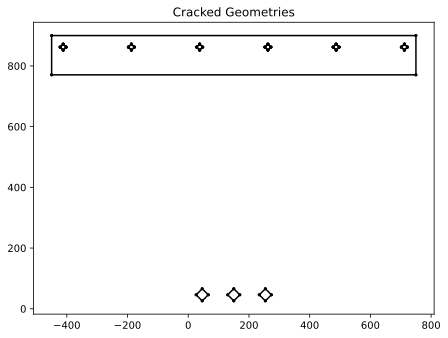

<AxesSubplot: title={'center': 'Cracked Geometries'}>

In [8]:
cracked_res_sag.plot_cracked_geometries(labels=[], cp=False, legend=False)

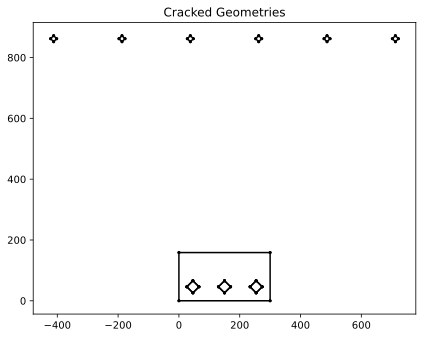

<AxesSubplot: title={'center': 'Cracked Geometries'}>

In [9]:
cracked_res_hog.plot_cracked_geometries(labels=[], cp=False, legend=False)